# 상관분석

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
cluster0 =[ 
'used_memory_rss',
'used_memory_rss_human',
'rss_overhead_ratio',
'rss_overhead_bytes',
'mem_fragmentation_ratio',
'mem_fragmentation_bytes']

cluster1 = [
    'uptime_in_seconds',
    'hz',
    'lru_clock',
    'used_memory_peak',
    'maxmemory',
    'maxmemory_human',
    'rdb_last_save_time',
    'total_net_output_bytes',
    'used_cpu_sys',
    'used_cpu_user'
]

cluster2 = [
    'allocator_allocated',
    'allocator_active',
    'allocator_frag_bytes',
    'instantaneous_ops_per_sec',
    'instantaneous_input_kbps',
    'instantaneous_output_kbps'
]

cluster3 = [
    'allocator_resident',
    'allocator_rss_ratio',
    'allocator_rss_bytes'  
]

knob_list = [
    "save0_0",
    "save0_1",
    "save1_0",
    "save1_1",
    "save2_0",
    "save2_1",

    "rdbcompression",
    "rdbchecksum",
    "rdb-save-incremental-fsync",

    "activedefrag",
    "active-defrag-threshold-lower",
    "active-defrag-threshold-upper",
    "active-defrag-cycle-min",
    "active-defrag-cycle-max",
    
    "maxmemory",
    
    "maxmemory-policy",
    "maxmemory-samples",
    "lazyfree-lazy-eviction",
    "lazyfree-lazy-expire",
    "lazyfree-lazy-server-del",

    "hash-max-ziplist-entries", 
    "hash-max-ziplist-value",
    "activerehashing",
    "hz",
    "dynamic-hz"
]

In [11]:
# 데이터 불러오기 internal metrics와 knob들의 상관관계분석
internal_m = pd.read_csv('./data/internal_metrcis0.csv')

In [12]:
# 데이터 불러오기 knob_list
knobs = pd.read_csv('./data/result_config0.csv')

In [13]:
# 정규화
from sklearn.preprocessing import StandardScaler

def scaling(df):
    scaler = StandardScaler()  # 객체 생성
    copied_df = df.copy()  # 복사
    scaler.fit(copied_df) # fitting
    scaled_df = scaler.transform(copied_df)
    
    scaled_df = pd.DataFrame(scaled_df, columns = df.columns, index=list(df.index.values))
    return scaled_df 

# scaler = StandardScaler()  # 객체 생성
# copied_internal = internal_m.copy()  # 복사
# scaler.fit(copied_internal)  # fitting
# scaledInternal_m = scaler.transform(copied_internal) 

# scaledInternal_m = pd.DataFrame(scaledInternal_m, columns = internal_m.columns, index = list(internal_m.index.values))

In [14]:
# internal metrics 추출 함수
def extract_internal(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]
    
    scaled_df = scaling(extracted_df)
    return scaled_df   

# knob 추출 함수
def extract_knob(cluster_list, df):
    extracted_df = pd.DataFrame()
    for elem in cluster_list:
        extracted_df[elem] = df[elem]

    return extracted_df    

## 전체 상관분석

In [15]:
# 클러스터 합치기
cluster = cluster0+cluster1+cluster2+cluster3

In [16]:
# 클러스터 요소에 해당되는 metrics 25개 추출
total_internal_df = extract_internal(cluster, internal_m)
total_internal_df.head()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,-0.097558,-0.087919,0.401373,0.369898,-0.069824,-0.102717,-0.029831,-1.136804,-1.751409,-0.164567,...,-1.249273,-0.204710,-0.099331,0.581053,0.370439,0.370424,0.368888,-0.463214,-0.468909,-0.458818
1,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.045070,1.002813,-1.749900,-0.164567,...,-0.977473,-0.200422,-0.099331,0.555693,1.041542,1.041507,1.041535,2.137230,2.134214,2.141791
2,-0.107436,-0.113206,0.401373,0.365359,-0.069824,-0.112553,-0.045070,1.687491,-1.748702,-0.164567,...,-1.385800,-0.216622,-0.099331,0.651499,0.726247,0.726267,0.724349,-0.463214,-0.468909,-0.458818
3,-0.591473,-0.593666,-0.067302,0.142978,-1.003301,-0.594513,-0.045070,1.430736,-1.747460,-0.164567,...,-1.435286,-0.204710,-0.099331,0.581053,0.805927,0.805897,0.808090,-0.463214,-0.468909,-0.458818
4,-0.087680,-0.087919,0.401373,0.374436,-0.069824,-0.092882,-0.029831,0.831644,-1.746218,-0.164567,...,-0.427683,-0.212334,-0.099331,0.626139,0.912414,0.912401,0.911783,-0.463214,-0.468909,-0.458818


In [17]:
# throughput 결측치 제거
total_internal_df.dropna()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,-0.097558,-0.087919,0.401373,0.369898,-0.069824,-0.102717,-0.029831,-1.136804,-1.751409,-0.164567,...,-1.249273,-0.204710,-0.099331,0.581053,0.370439,0.370424,0.368888,-0.463214,-0.468909,-0.458818
1,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.045070,1.002813,-1.749900,-0.164567,...,-0.977473,-0.200422,-0.099331,0.555693,1.041542,1.041507,1.041535,2.137230,2.134214,2.141791
2,-0.107436,-0.113206,0.401373,0.365359,-0.069824,-0.112553,-0.045070,1.687491,-1.748702,-0.164567,...,-1.385800,-0.216622,-0.099331,0.651499,0.726247,0.726267,0.724349,-0.463214,-0.468909,-0.458818
3,-0.591473,-0.593666,-0.067302,0.142978,-1.003301,-0.594513,-0.045070,1.430736,-1.747460,-0.164567,...,-1.435286,-0.204710,-0.099331,0.581053,0.805927,0.805897,0.808090,-0.463214,-0.468909,-0.458818
4,-0.087680,-0.087919,0.401373,0.374436,-0.069824,-0.092882,-0.029831,0.831644,-1.746218,-0.164567,...,-0.427683,-0.212334,-0.099331,0.626139,0.912414,0.912401,0.911783,-0.463214,-0.468909,-0.458818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.690256,-0.694816,-0.067302,0.152055,-1.003301,-0.785468,-0.029831,0.403720,1.730511,-0.164567,...,-0.067484,0.947864,1.038740,0.978370,1.293751,1.293762,1.290181,-0.524043,-0.468909,-0.570346
2496,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.029831,-1.136804,1.731754,-0.164567,...,-0.704646,-0.210189,-0.099331,0.613458,0.137848,0.137827,0.136800,2.137230,2.134214,2.141791
2497,-0.077801,-0.087919,0.401373,0.378975,-0.069824,-0.083046,-0.029831,-0.623296,1.732996,-0.164567,...,-0.328716,-0.200184,-0.099331,0.554284,-0.196998,-0.197022,-0.193145,-0.463214,-0.468909,-0.458818
2498,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.029831,1.259567,1.734282,4.822298,...,-1.456196,-0.200422,-0.099331,0.555693,-1.222564,-1.222601,-1.226003,2.137230,2.134214,2.141791


In [18]:
total_internal_df.shape

(2500, 25)

In [19]:
# throughtpu 결측치 확인
total_internal_df.notna().sum()
total_internal_df.isnull().sum()

used_memory_rss              0
used_memory_rss_human        0
rss_overhead_ratio           0
rss_overhead_bytes           0
mem_fragmentation_ratio      0
mem_fragmentation_bytes      0
uptime_in_seconds            0
hz                           0
lru_clock                    0
used_memory_peak             0
maxmemory                    0
maxmemory_human              0
rdb_last_save_time           0
total_net_output_bytes       0
used_cpu_sys                 0
used_cpu_user                0
allocator_allocated          0
allocator_active             0
allocator_frag_bytes         0
instantaneous_ops_per_sec    0
instantaneous_input_kbps     0
instantaneous_output_kbps    0
allocator_resident           0
allocator_rss_ratio          0
allocator_rss_bytes          0
dtype: int64

In [20]:
# throuput 결측치 처리
total_internal_df.fillna(0)

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,uptime_in_seconds,hz,lru_clock,used_memory_peak,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,-0.097558,-0.087919,0.401373,0.369898,-0.069824,-0.102717,-0.029831,-1.136804,-1.751409,-0.164567,...,-1.249273,-0.204710,-0.099331,0.581053,0.370439,0.370424,0.368888,-0.463214,-0.468909,-0.458818
1,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.045070,1.002813,-1.749900,-0.164567,...,-0.977473,-0.200422,-0.099331,0.555693,1.041542,1.041507,1.041535,2.137230,2.134214,2.141791
2,-0.107436,-0.113206,0.401373,0.365359,-0.069824,-0.112553,-0.045070,1.687491,-1.748702,-0.164567,...,-1.385800,-0.216622,-0.099331,0.651499,0.726247,0.726267,0.724349,-0.463214,-0.468909,-0.458818
3,-0.591473,-0.593666,-0.067302,0.142978,-1.003301,-0.594513,-0.045070,1.430736,-1.747460,-0.164567,...,-1.435286,-0.204710,-0.099331,0.581053,0.805927,0.805897,0.808090,-0.463214,-0.468909,-0.458818
4,-0.087680,-0.087919,0.401373,0.374436,-0.069824,-0.092882,-0.029831,0.831644,-1.746218,-0.164567,...,-0.427683,-0.212334,-0.099331,0.626139,0.912414,0.912401,0.911783,-0.463214,-0.468909,-0.458818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.690256,-0.694816,-0.067302,0.152055,-1.003301,-0.785468,-0.029831,0.403720,1.730511,-0.164567,...,-0.067484,0.947864,1.038740,0.978370,1.293751,1.293762,1.290181,-0.524043,-0.468909,-0.570346
2496,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.029831,-1.136804,1.731754,-0.164567,...,-0.704646,-0.210189,-0.099331,0.613458,0.137848,0.137827,0.136800,2.137230,2.134214,2.141791
2497,-0.077801,-0.087919,0.401373,0.378975,-0.069824,-0.083046,-0.029831,-0.623296,1.732996,-0.164567,...,-0.328716,-0.200184,-0.099331,0.554284,-0.196998,-0.197022,-0.193145,-0.463214,-0.468909,-0.458818
2498,-0.087680,-0.087919,-1.941999,-1.953764,-0.069824,-0.092882,-0.029831,1.259567,1.734282,4.822298,...,-1.456196,-0.200422,-0.099331,0.555693,-1.222564,-1.222601,-1.226003,2.137230,2.134214,2.141791


In [21]:
# knobs 에서 object 형 찾기
object_var = []
for idx in knobs.dtypes.index:
    if knobs.dtypes[idx] == 'O':
        object_var.append(idx)
object_var

['rdbcompression',
 'rdbchecksum',
 'rdb-save-incremental-fsync',
 'activedefrag',
 'maxmemory',
 'maxmemory-policy',
 'lazyfree-lazy-eviction',
 'lazyfree-lazy-expire',
 'lazyfree-lazy-server-del',
 'activerehashing',
 'dynamic-hz']

In [22]:
# knob_list 만 추출
subTotal_knobs = extract_knob(knob_list, knobs)

# object 형 제거
knobs_numeric = subTotal_knobs.drop(columns=object_var, axis=0)
knobs_numeric = scaling(knobs_numeric)  # 표준화
knobs_numeric.head()

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,-0.780279,-0.000768,-1.062691,1.358170,-1.403396,-0.641402,0.863499,-0.132449,0.961418,-1.356903,0.007108,-1.722876,1.667901,-1.136804
1,1.723914,-0.769250,1.704779,-0.876930,1.251229,-0.487309,1.098036,1.634007,-0.304660,-0.049598,-1.414410,-1.013264,1.281451,1.002813
2,1.046410,-1.153490,1.687536,-1.262292,-1.403396,-1.138780,0.159886,-0.684467,1.652006,-1.520316,-1.414410,-0.985436,-0.006716,1.687491
3,-0.325751,-0.000768,1.049552,-1.609118,1.135810,-1.345949,-0.426457,-0.905274,0.155732,1.421119,-1.414410,-0.616717,0.522864,1.430736
4,-1.449207,0.383472,-0.614378,-0.067670,0.039335,-1.414435,-0.778263,0.198762,-0.304660,0.767467,-0.703651,0.113766,0.064849,0.831644


In [23]:
# knob 결측치 제거
knobs_numeric.dropna()

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,-0.780279,-0.000768,-1.062691,1.358170,-1.403396,-0.641402,0.863499,-0.132449,0.961418,-1.356903,0.007108,-1.722876,1.667901,-1.136804
1,1.723914,-0.769250,1.704779,-0.876930,1.251229,-0.487309,1.098036,1.634007,-0.304660,-0.049598,-1.414410,-1.013264,1.281451,1.002813
2,1.046410,-1.153490,1.687536,-1.262292,-1.403396,-1.138780,0.159886,-0.684467,1.652006,-1.520316,-1.414410,-0.985436,-0.006716,1.687491
3,-0.325751,-0.000768,1.049552,-1.609118,1.135810,-1.345949,-0.426457,-0.905274,0.155732,1.421119,-1.414410,-0.616717,0.522864,1.430736
4,-1.449207,0.383472,-0.614378,-0.067670,0.039335,-1.414435,-0.778263,0.198762,-0.304660,0.767467,-0.703651,0.113766,0.064849,0.831644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,1.200778,0.383472,0.730560,-0.221814,-0.999432,-0.192820,-1.130069,1.192393,0.040634,1.257706,-1.414410,1.456463,1.610650,-1.222389
2495,-1.457783,0.383472,-0.372979,-1.185220,-0.364630,-1.227811,-0.309188,1.634007,0.616124,0.930880,1.428625,0.225078,-1.180379,0.403720
2496,0.291721,1.151953,-1.166148,1.627924,-0.595467,0.114510,-1.481876,0.750779,1.076516,-0.213011,-0.703651,1.595602,-0.994310,-1.136804
2497,-0.608759,-0.385009,1.161631,0.510374,-0.999432,0.707767,1.098036,1.413200,-1.455641,-0.866664,-0.703651,0.225078,-1.051562,-0.623296


In [24]:
knobs_numeric.shape

(2500, 14)

In [25]:
# knob 결측치 처리
knobs_numeric.notna().sum()
# total_internal_df.isnull().sum()

save0_0                          2500
save0_1                          2500
save1_0                          2500
save1_1                          2500
save2_0                          2500
save2_1                          2500
active-defrag-threshold-lower    1252
active-defrag-threshold-upper    1252
active-defrag-cycle-min          1252
active-defrag-cycle-max          1252
maxmemory-samples                2500
hash-max-ziplist-entries         2500
hash-max-ziplist-value           2500
hz                               2500
dtype: int64

In [26]:
# knob 결측치 처리
knobs_numeric.fillna(0)

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
0,-0.780279,-0.000768,-1.062691,1.358170,-1.403396,-0.641402,0.863499,-0.132449,0.961418,-1.356903,0.007108,-1.722876,1.667901,-1.136804
1,1.723914,-0.769250,1.704779,-0.876930,1.251229,-0.487309,1.098036,1.634007,-0.304660,-0.049598,-1.414410,-1.013264,1.281451,1.002813
2,1.046410,-1.153490,1.687536,-1.262292,-1.403396,-1.138780,0.159886,-0.684467,1.652006,-1.520316,-1.414410,-0.985436,-0.006716,1.687491
3,-0.325751,-0.000768,1.049552,-1.609118,1.135810,-1.345949,-0.426457,-0.905274,0.155732,1.421119,-1.414410,-0.616717,0.522864,1.430736
4,-1.449207,0.383472,-0.614378,-0.067670,0.039335,-1.414435,-0.778263,0.198762,-0.304660,0.767467,-0.703651,0.113766,0.064849,0.831644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.457783,0.383472,-0.372979,-1.185220,-0.364630,-1.227811,-0.309188,1.634007,0.616124,0.930880,1.428625,0.225078,-1.180379,0.403720
2496,0.291721,1.151953,-1.166148,1.627924,-0.595467,0.114510,-1.481876,0.750779,1.076516,-0.213011,-0.703651,1.595602,-0.994310,-1.136804
2497,-0.608759,-0.385009,1.161631,0.510374,-0.999432,0.707767,1.098036,1.413200,-1.455641,-0.866664,-0.703651,0.225078,-1.051562,-0.623296
2498,1.106442,-1.537731,-1.545490,-0.221814,0.385590,-0.188540,-1.716413,-1.126081,1.191614,-1.030077,-1.414410,-1.173275,-1.180379,1.259567


In [27]:
# 데이터 프레임 합치기
total_df = pd.concat([knobs_numeric, total_internal_df], axis=1)
total_df

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,...,used_cpu_user,allocator_allocated,allocator_active,allocator_frag_bytes,instantaneous_ops_per_sec,instantaneous_input_kbps,instantaneous_output_kbps,allocator_resident,allocator_rss_ratio,allocator_rss_bytes
0,-0.780279,-0.000768,-1.062691,1.358170,-1.403396,-0.641402,0.863499,-0.132449,0.961418,-1.356903,...,-1.249273,-0.204710,-0.099331,0.581053,0.370439,0.370424,0.368888,-0.463214,-0.468909,-0.458818
1,1.723914,-0.769250,1.704779,-0.876930,1.251229,-0.487309,1.098036,1.634007,-0.304660,-0.049598,...,-0.977473,-0.200422,-0.099331,0.555693,1.041542,1.041507,1.041535,2.137230,2.134214,2.141791
2,1.046410,-1.153490,1.687536,-1.262292,-1.403396,-1.138780,0.159886,-0.684467,1.652006,-1.520316,...,-1.385800,-0.216622,-0.099331,0.651499,0.726247,0.726267,0.724349,-0.463214,-0.468909,-0.458818
3,-0.325751,-0.000768,1.049552,-1.609118,1.135810,-1.345949,-0.426457,-0.905274,0.155732,1.421119,...,-1.435286,-0.204710,-0.099331,0.581053,0.805927,0.805897,0.808090,-0.463214,-0.468909,-0.458818
4,-1.449207,0.383472,-0.614378,-0.067670,0.039335,-1.414435,-0.778263,0.198762,-0.304660,0.767467,...,-0.427683,-0.212334,-0.099331,0.626139,0.912414,0.912401,0.911783,-0.463214,-0.468909,-0.458818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-1.457783,0.383472,-0.372979,-1.185220,-0.364630,-1.227811,-0.309188,1.634007,0.616124,0.930880,...,-0.067484,0.947864,1.038740,0.978370,1.293751,1.293762,1.290181,-0.524043,-0.468909,-0.570346
2496,0.291721,1.151953,-1.166148,1.627924,-0.595467,0.114510,-1.481876,0.750779,1.076516,-0.213011,...,-0.704646,-0.210189,-0.099331,0.613458,0.137848,0.137827,0.136800,2.137230,2.134214,2.141791
2497,-0.608759,-0.385009,1.161631,0.510374,-0.999432,0.707767,1.098036,1.413200,-1.455641,-0.866664,...,-0.328716,-0.200184,-0.099331,0.554284,-0.196998,-0.197022,-0.193145,-0.463214,-0.468909,-0.458818
2498,1.106442,-1.537731,-1.545490,-0.221814,0.385590,-0.188540,-1.716413,-1.126081,1.191614,-1.030077,...,-1.456196,-0.200422,-0.099331,0.555693,-1.222564,-1.222601,-1.226003,2.137230,2.134214,2.141791


In [46]:
# 상관분석
total_corr = total_df.corr()
total_corr_dropped = total_corr.iloc[14:,6:14]
total_corr_dropped

,active-defrag-threshold-lower,active-defrag-threshold-upper,active-defrag-cycle-min,active-defrag-cycle-max,maxmemory-samples,hash-max-ziplist-entries,hash-max-ziplist-value,hz
used_memory_rss,0.000994,-0.036325,-0.017982,0.011084,0.012910,0.013128,0.006594,-0.025411
used_memory_rss_human,0.000933,-0.035962,-0.018194,0.011491,0.013163,0.013107,0.006808,-0.025506
rss_overhead_ratio,-0.053878,-0.031616,-0.038560,0.008291,0.005675,0.028696,-0.021043,-0.032820
rss_overhead_bytes,-0.049602,-0.033496,-0.034073,0.012002,0.006500,0.025948,-0.020679,-0.033985
mem_fragmentation_ratio,-0.001833,-0.032134,-0.020953,0.011560,0.014031,0.013851,0.008932,-0.022270
mem_fragmentation_bytes,0.000200,-0.041237,-0.013752,0.008546,0.013958,0.012699,0.005881,-0.008555
uptime_in_seconds,-0.003341,-0.017158,0.029321,0.011329,0.028381,0.015758,0.001167,0.019588
hz,-0.049257,0.011778,0.004380,-0.027743,0.005914,-0.014726,0.012371,1.000000
lru_clock,-0.032636,0.020038,0.037258,0.014114,0.011524,-0.001238,-0.004052,0.042221
used_memory_peak,0.009897,-0.002531,0.022953,-0.032141,0.010385,-0.008221,-0.018179,-0.007397


## 스피어만 상관분석 테스트

In [135]:
from scipy import stats
x = total_internal_df['used_cpu_sys'].values
y = knobs_numeric['hash-max-ziplist-entries'].values

stats.spearmanr(X, y)

SpearmanrResult(correlation=0.017984455014598204, pvalue=0.3687348403111076)

---

### 넘파이 상관계수 및 공분산

In [53]:
# 상관계수 함수
def corr_np(X, Y):    
    cov = np.cov(X, Y)[0,1]  # 공분산
    corr = cov/(np.std(X)*np.std(Y))  # 표준화
    return corr

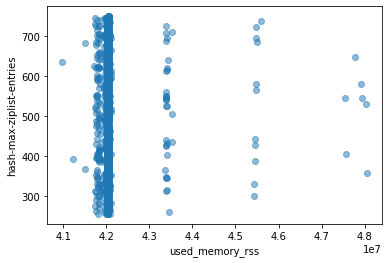

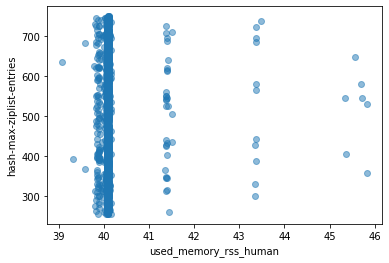

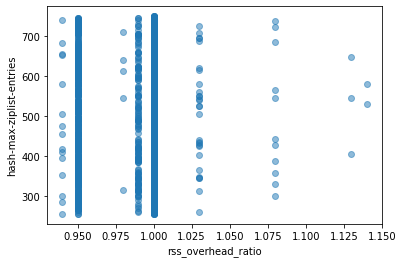

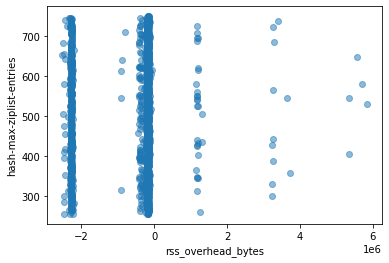

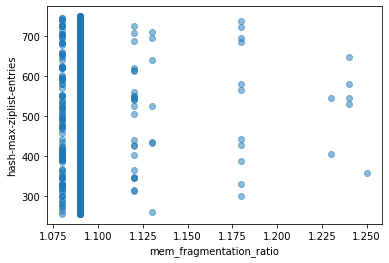

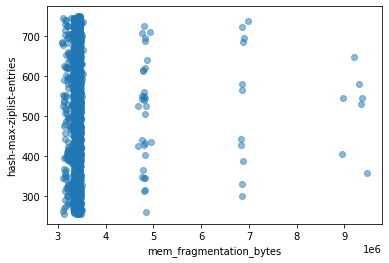

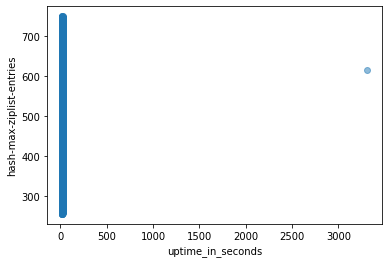

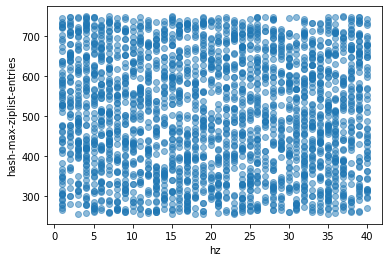

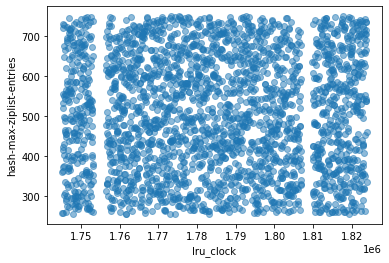

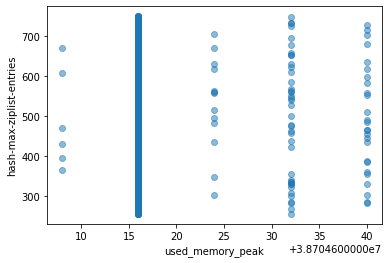

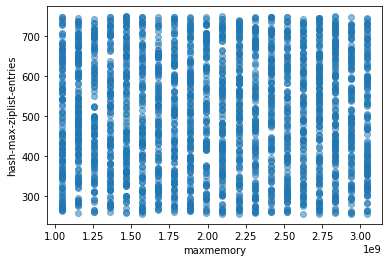

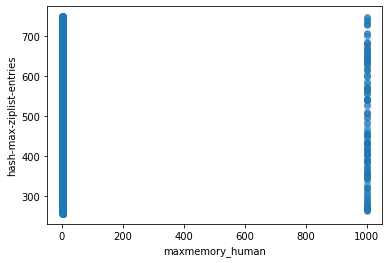

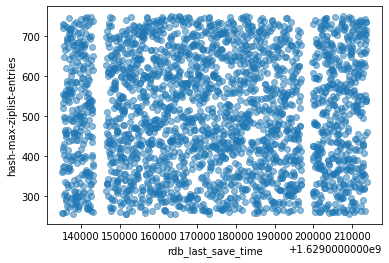

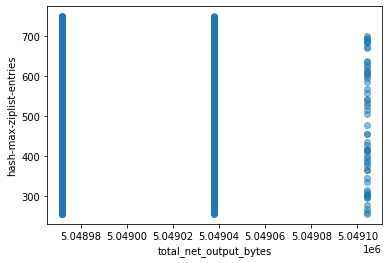

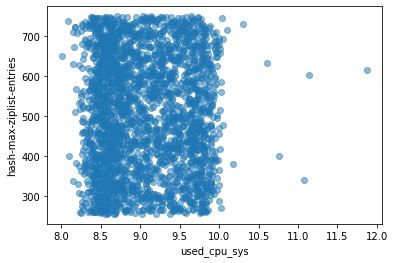

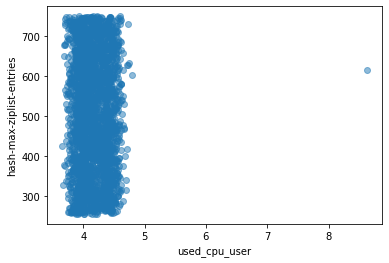

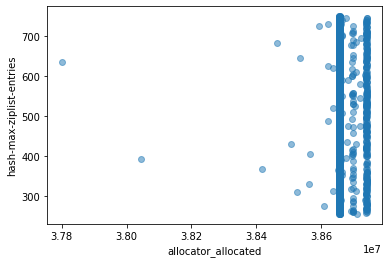

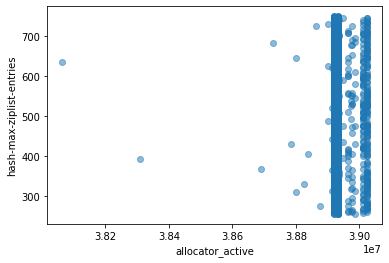

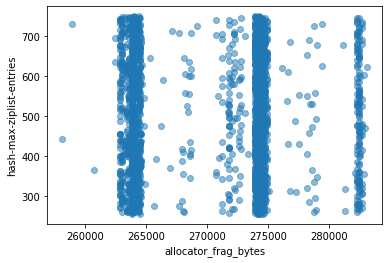

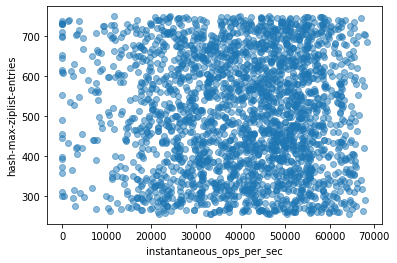

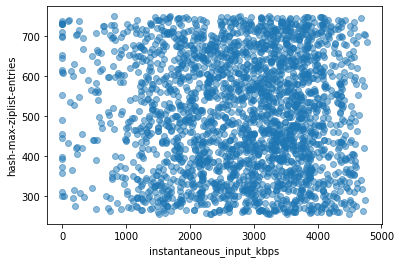

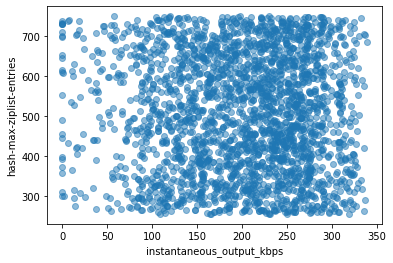

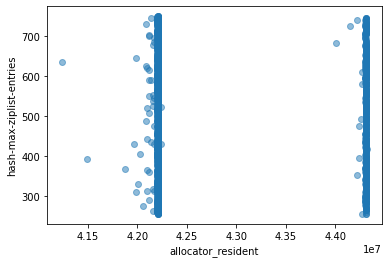

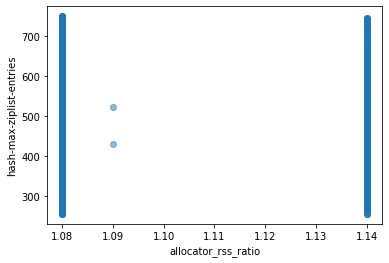

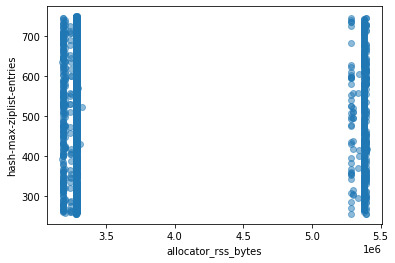

In [82]:
# konb: hash-map-ziplist-entries, internal은 전체 산점도
for internal in total_internal_df:
    plt.scatter(total_internal_df[internal], knobs_numeric['hash-max-ziplist-entries'], alpha=0.5)
    plt.xlabel(internal)
    plt.ylabel('hash-max-ziplist-entries')
    plt.show()
    

---

In [144]:
# internal cluster 리스트 가져오기 
cluster0_internal = extract_internal(cluster0, internal_m)
cluster1_internal = extract_internal(cluster1, internal_m)
cluster2_internal = extract_internal(cluster2, internal_m)
cluster3_internal = extract_internal(cluster3, internal_m)


In [ ]:
# 상관분석 knob 하나에 대해서
def corr(knob, cluster_internal):
    cluster_internal[knob.columns[0]] = knob
    
    corr = cluster_internal.corr()
    print(corr.iloc[:,-1])
#     print(corr)
    
#     sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [158]:
# knob 가져오기
knob_df = extract_knob(knob_list, knobs)

# 하나만 대입
knob_df1 = knob_df[['hz']]
scaled_knob_df1 = scaling(knob_df1)

allocator_allocated         -0.176843
allocator_active            -0.180201
allocator_frag_bytes        -0.096348
instantaneous_ops_per_sec   -0.228475
instantaneous_input_kbps    -0.228475
instantaneous_output_kbps   -0.227200
active-defrag-cycle-min      0.004380
hz                           1.000000
Name: hz, dtype: float64


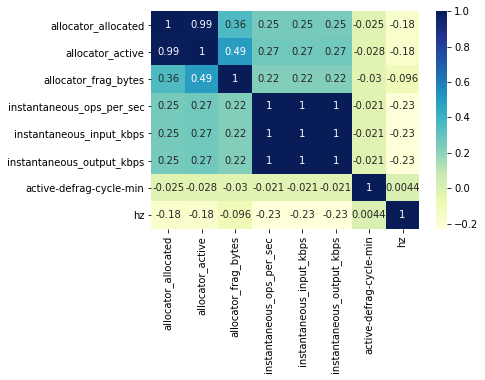

In [161]:
# corr(scaled_knob_df1, cluster0_internal) 
# corr(scaled_knob_df1, cluster1_internal)  # maxmemory-samples, hz
# corr(scaled_knob_df1, cluster2_internal) 
# corr(scaled_knob_df1, cluster3_internal)

In [70]:
df_t.corr()

,used_memory_rss,used_memory_rss_human,rss_overhead_ratio,rss_overhead_bytes,mem_fragmentation_ratio,mem_fragmentation_bytes,maxmemory-samples
used_memory_rss,1.000000,0.999974,0.440043,0.445659,0.991678,0.995400,0.012910
used_memory_rss_human,0.999974,1.000000,0.439682,0.445294,0.991652,0.995361,0.013163
rss_overhead_ratio,0.440043,0.439682,1.000000,0.996718,0.437873,0.439462,0.005675
rss_overhead_bytes,0.445659,0.445294,0.996718,1.000000,0.440232,0.445696,0.006500
mem_fragmentation_ratio,0.991678,0.991652,0.437873,0.440232,1.000000,0.990840,0.014031
mem_fragmentation_bytes,0.995400,0.995361,0.439462,0.445696,0.990840,1.000000,0.013958
maxmemory-samples,0.012910,0.013163,0.005675,0.006500,0.014031,0.013958,1.000000


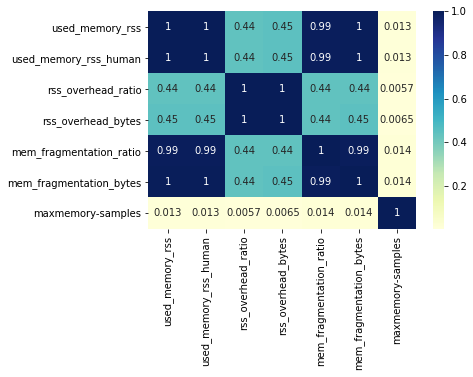

In [77]:
sns.heatmap(df_t.corr(),cmap = 'YlGnBu', annot=True) 
plt.show()